In [1]:
import pickle
from typing import *
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [13]:
import torch
import torch.nn.functional as F

a = torch.arange(1, 5).float()
# [num_tokens, embedding_dim]
x = a[:, None] * a[None, :]
w = x @ x.transpose(0, 1)
F.softmax(w, 1)

tensor([[8.1940e-40, 8.7565e-27, 9.3576e-14, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 8.7565e-27, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 8.1940e-40, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [3]:
def tile_array(
        im: np.ndarray,
        tile_splits: Tuple[int, int]
    ) -> np.ndarray:
    """
    Разбить изображение на тайлы

    Parameters
    ==========
    im: np.ndarray
        Матрица размера (batch_size, height, width, channels)
    tile_splits: Tuple[int, int]
        Кортеж (height_splits, width_splits): сколько тайлов будет на вертикальной оси и на горизонтальной

    Returns
    =======
    tiled_im: np.ndarray
        Матрица размера (batch_size, height_splits, width_splits, tile_height, tile_width, channels)
    """
    assert im.ndim == 4

    batch_size, height, width, channels = im.shape
    assert channels in [1, 3, 4], f'Неправильное количество каналов: {channels}'

    height_splits, width_splits = tile_splits

    assert height % height_splits == 0, f'Высота изображения {height} не делится на кол-во сплитов тайлов {height_splits}'
    assert width % width_splits == 0, f'Ширина изображения {width} не делится на кол-во сплитов тайлов {width_splits}'

    tile_height, tile_width = height // height_splits, width // width_splits

    new_shape = (batch_size, height_splits, tile_height, width_splits, tile_width, channels)
    tiled_im = im.reshape(new_shape).swapaxes(2, 3)

    return tiled_im

def untile_array(
        tiled_im: np.ndarray
    ) -> np.ndarray:
    """
    Объединить тайлы в одно изображение

    Parameters
    ==========
    tiled_im: np.ndarray
        Матрица размера (batch_size, height_splits, width_splits, tile_height, tile_width, channels)

    Returns
    =======
    im: np.ndarray
        Матрица размера (height_splits * tile_height, width_splits * tile_width, channels)
    """

    batch_size, height_splits, width_splits, tile_height, tile_width, channels = tiled_im.shape

    im = tiled_im.swapaxes(2, 3)
    return im.reshape(batch_size, height_splits * tile_height, width_splits * tile_width, channels)


def make_divisible(val, divisor):
    return val - (val % divisor)


def resize_array_divisible(
        im: np.ndarray,
        divisors: Tuple[int, int],
        interpolation: int = cv2.INTER_NEAREST,
) -> np.ndarray:
    """

    Parameters
    ==========
    divisors: Tuple[int, int]
        На сколько должны быть делимы height, width
    interpolation: enum
        Значение интерполяции из cv2 (например cv2.INTER_NEAREST)
    """

    height, width = im.shape[:2]
    height = make_divisible(height, divisors[0])
    width = make_divisible(width, divisors[1])
    im = cv2.resize(im, (width, height), interpolation=interpolation)
    return im


A = np.arange(100).reshape(10, 10)
A_ = resize_array_divisible(A, (3, 2))
tile_array(A_, (3, 2))

AssertionError: 

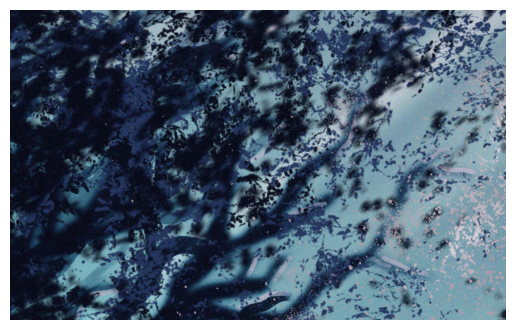

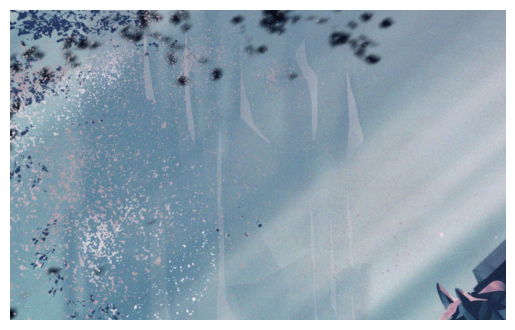

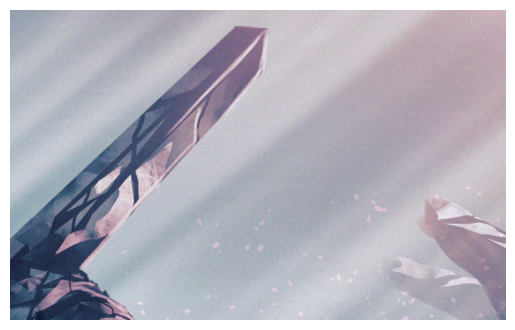

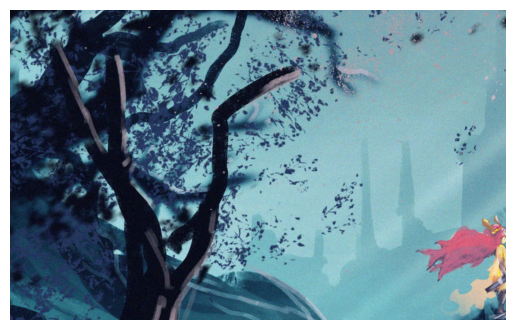

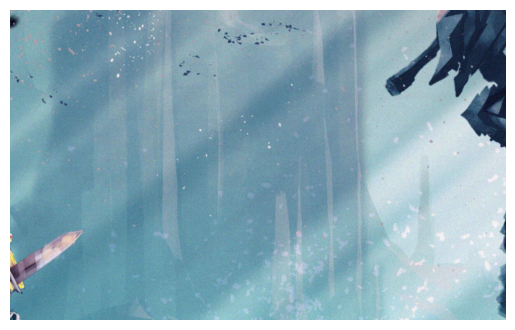

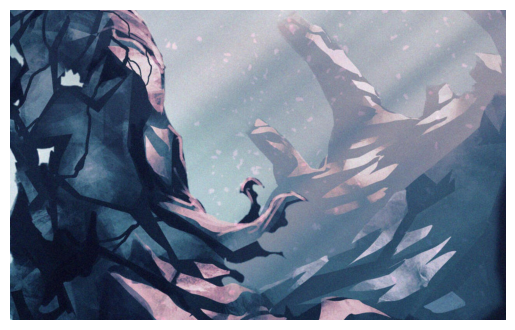

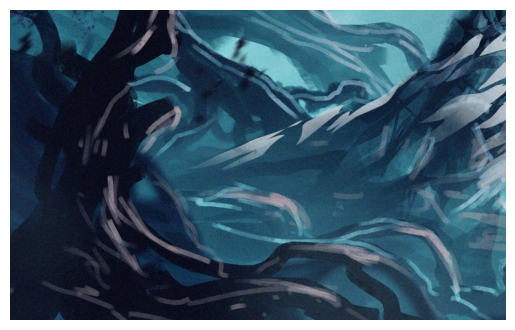

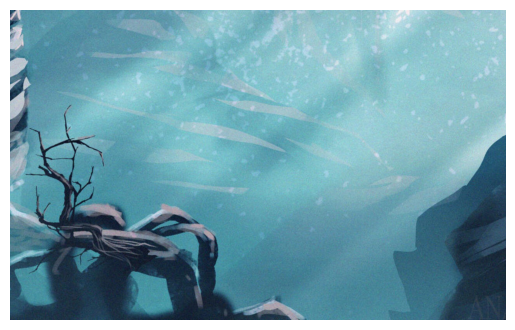

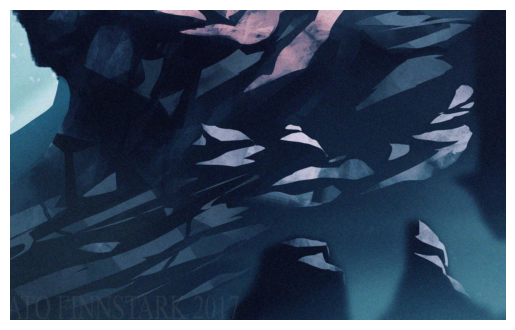

In [8]:
im = Image.open('/Users/user/Main/Content/Photos/Wallpapers/child-of-light-af-3840x2400.jpg')
im = np.array(im)
tile_splits = (3, 3)
im = resize_array_divisible(im, tile_splits)

tiles = tile_array(im[None, ...], tile_splits)

for row in range(tile_splits[0]):
    for col in range(tile_splits[1]):
        plt.imshow(tiles[0, row, col])
        plt.axis('off')
        plt.show()